# Import Library

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install nltk

In [5]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
!pip install senticnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 MB 5.7 MB/s eta 0:00:00


In [7]:
import numpy as np
import csv
import pandas as pd
import spacy
import re
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from senticnet.senticnet import SenticNet
from nltk.stem import PorterStemmer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import csv
import string
nlp = spacy.load('en_core_web_sm')

In [7]:
# Create an instance of SenticNet
sn = SenticNet()

# Get sentiment information for a word
word = "love"
sentiment_info = sn.sentics(word)

# Print the sentiment information
print(f"Sentiment information for '{word}': {sentiment_info['introspection']}")


Sentiment information for 'love': 0.897


# Read Review


> **Attributes:**

* chunk_size (int): The size of each chunk when reading the CSV file.

* chunks (pd.DataFrame): The concatenated DataFrame from reading CSV chunks.
    
* df_data (pd.DataFrame): The final DataFrame after dropping NaN values.



In [10]:
chunk_size = 1000  # Adjust the size as needed
chunks = pd.read_csv('/content/drive/MyDrive/ASC/0-1000 Courses.csv', chunksize=chunk_size)
df_data = pd.concat(chunks)
df_data = df_data.dropna()

print(df_data.head())
print(len(df_data))

                                         Review Text
0  What you learn in the course is very basic. Th...
1  Too fast, the English is not clear, strong acc...
2  The instructor did not really do a good enough...
3  it's ok for understanding the basics. It distr...
4  The training was great. The instructor was kno...
478775




---


# Preprocessing Module.




> This module provides functions for preprocessing text reviews. The preprocessin steps include removing mentions, converting to lowercase, handling repeated letters, merging numbers, removing punctuation, removing single-letter words, removing stop words, stemming, lemmatization, and merging specific terms related to aspects such as 'teacher' and 'course'.




# Attributes:

*  aspect_1 (list) : List of terms related to the 'teacher' aspect.

*  aspect_2 (list) : List of terms related to the 'course' aspect.

# Functions:

* delete_mention: Remove mentions and URLs from a review.

* lower_case_letters: Convert a review to lowercase.

* delete_repeated_letters: Remove repeated letters in a review.

* merge_num: Merge numerical values in a review.

* delete_punctuation: Remove punctuation from a review.

* remove_single_letter_words: Remove single-letter words from a review.

* delete_stop_words: Remove stop words from a review.

* stem: Apply stemming to a review.

* lemma: Apply lemmatization to a review.

* merge: Merge specific terms in a review based on provided aspects.

* preprocess_review: Perform a series of preprocessing steps on a review.

# Todo:

* Add more detailed examples in the docstrings.

* Explore additional preprocessing techniques.

In [11]:
def delete_mention(review, mention_on=True):
    """Remove mentions and URLs from a review."""
    if mention_on:
        review = re.sub(r"@\S+", '', review)
        review = re.sub(r'https?\S+', '', review)
    return review

def lower_case_letters(review, lowercase_on=True):
    """Convert a review to lowercase."""
    if lowercase_on:
        review = word_tokenize(review.lower())
    return ' '.join(review)

def delete_repeated_letters(review, repeated_on=True):
    """Remove repeated letters in a review."""
    if repeated_on:
        review = re.sub(r'(.)\1{2,}', r'\1', review)
    return review

def merge_num(review, merge_num_on=True):
    """Merge numerical values in a review."""
    if merge_num_on:
        review = re.sub(r"[0-9]+(\.)?[0-9]+", "1", review)
    return review

def delete_punctuation(review, punctuation_on=True):
    """Remove punctuation from a review."""
    if punctuation_on:
        review = re.sub(r'[,:;!-\./(){}[]|؟]', ' ', review)
    return review

def remove_single_letter_words(review, remove_single_on=True):
    """Remove single-letter words from a review."""
    if remove_single_on:
        pattern = r'\b[a-hj-z]\b'
        review = re.sub(pattern, '', review)
    return review

def delete_stop_words(review, stop_words_on=True):
    if stop_words_on:
        stop_words = set(stopwords.words('english'))
        tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(review)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        return ' '.join(filtered_tokens)
    return review

def stem(review, stem_on=True):
    if stem_on:
        porter = PorterStemmer()
        review = word_tokenize(review)
        review = [porter.stem(word) for word in review]
        return ' '.join(review)
    return review

def lemma(review, lemma_on=True):
    if lemma_on:
        lemmatizer = WordNetLemmatizer()
        review = word_tokenize(review)
        review = [lemmatizer.lemmatize(word) for word in review]
        return ' '.join(review)
    return review

def merge(review, aspects, aspect, merge_on=True):
    if merge_on:
        pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, aspects)) + r')\b', re.IGNORECASE)
        merged_review = pattern.sub(aspect, review)
        return merged_review
    return review

def preprocess_review(review, mention_on=True, lowercase_on=True, repeated_on=True,
                       merge_num_on=True, punctuation_on=True, remove_single_on=True,
                       stop_words_on=True, stem_on=False, lemma_on=True):

    """Perform a series of preprocessing steps on a review.

    Args:
        review (str): The input text review.
        mention_on (bool): Whether to remove mentions and URLs.
        lowercase_on (bool): Whether to convert to lowercase.
        repeated_on (bool): Whether to handle repeated letters.
        merge_num_on (bool): Whether to merge numerical values.
        punctuation_on (bool): Whether to remove punctuation.
        remove_single_on (bool): Whether to remove single-letter words.
        stop_words_on (bool): Whether to remove stop words.
        stem_on (bool): Whether to apply stemming.
        lemma_on (bool): Whether to apply lemmatization.

    Returns:
        str: The preprocessed review.

    """
    aspect_1 = ["teacher", "teachers", "instructor", "instructors", "professors", "professor", "lecturer", "profs",
                "prof", 'educator', 'tutor', 'tutors', 'mentor', 'mentors', 'coach', 'coaches', 'guide', 'guides',
                'facilitator', 'facilitators', 'pedagogue', 'pedagogues', 'schoolmaster', 'schoolmasters',
                'schoolmistress', 'preceptor', 'preceptors', 'academic', 'academics', 'trainer', 'trainers',
                'counsellor', 'counsellors', 'adviser', 'advisers', 'pedagogist', 'pedagogists', 'didactic', 'master']

    aspect_2 = ["class", "courses", "course", "materials", "material", "syllabus", "homeworks", "exercise", "exercises",
                'program', 'module', 'lecture', 'seminar', 'workshop', 'curriculum', 'subject', 'training', 'session',
                'Sections', 'Section', 'lesson', 'unit', 'elective', 'tutorial', 'education', 'Path', 'track', 'programs',
                'modules', 'lectures', 'seminars', 'workshops', 'Curricula', 'subjects', 'trainings', 'sessions',
                'lessons', 'units', 'electives', 'tutorials', 'workshops', 'educations', 'Paths', 'tracks']

    review = lower_case_letters(review, lowercase_on)
    review = delete_stop_words(review, stop_words_on)
    review = delete_punctuation(review, punctuation_on)
    review = delete_repeated_letters(review, repeated_on)
    review = delete_mention(review, mention_on)
    review = merge_num(review, merge_num_on)
    review = remove_single_letter_words(review, remove_single_on)
    review = merge(review, aspect_1, 'teacher')
    review = merge(review, aspect_2, 'course')
    review = lemma(review, lemma_on)

    return review


In [12]:
df_data['Processed Review'] = df_data['Review Text'].apply(preprocess_review)
print(len(df_data))
df_data.head(5)

478775


,Review Text,Processed Review
0,What you learn in the course is very basic. Th...,what you learn in the course is very basic . t...
1,"Too fast, the English is not clear, strong acc...","too fast , the english is not clear , strong a..."
2,The instructor did not really do a good enough...,the teacher did not really do a good enough jo...
3,it's ok for understanding the basics. It distr...,it 's ok for understanding the basic . it dist...
4,The training was great. The instructor was kno...,the course wa great . the teacher wa knowledge...


In [13]:
review_text = "The instructors were very knowledgeable, and they explained grammar well, especially the English instructors."
merged_review = preprocess_review(review_text)
print(merged_review)

the teacher were very knowledgeable , and they explained grammar well , especially the english teacher .


# Sentic Concepts

In [14]:
# Read CSV file into DataFrame
df_sentic_concepts = pd.read_csv('/content/drive/MyDrive/ASC/sentic_concepts.csv')

# Print first 5 rows of DataFrame
print(df_sentic_concepts.head())

   POLARITY  Unnamed: 1     CONCEPT
0  negative         NaN         aah
1  negative         NaN   abacinate
2  negative         NaN  abacterial
3  negative         NaN    abaction
4  negative         NaN     abactor


# Senticnet Polarity

In [15]:
df_senticnet_polarity =  pd.read_csv('/content/drive/MyDrive/ASC/senticnet.csv')
df_senticnet_polarity.head()

,CONCEPT,INTROSPECTION,TEMPER,ATTITUDE,SENSITIVITY,PRIMARY EMOTION,SECONDAY EMOTION,POLARITY VALUE,POLARITY INTENSITY,SEMANTICS,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,aah,-0.638,0.0,0.000,0.000,#sadness,None,negative,-0.638,weep,whimper,tear_up,gah,cry
1,abacinate,-0.847,0.0,-0.799,0.000,#grief,#loathing,negative,-0.823,sadheart,sorrow,deject,wow_sad,sadz
2,abacterial,-0.886,0.0,-0.780,0.000,#grief,#loathing,negative,-0.833,abacterial,abacterial,abacterial,abacterial,abacterial
3,abaction,0.000,0.0,0.000,-0.329,#anxiety,None,negative,-0.329,abactor,actionless,actless,actor_proof,deactivate
4,abactor,0.000,0.0,0.000,-0.329,#anxiety,None,negative,-0.329,abaction,actionless,actless,actor_proof,deactivate


# Preparing a dictionary containing the concepts and their polarity

In [16]:
concept_POLARITY_score={}
concept_POLARITY_value={}

In [17]:
for i,row in enumerate(df_sentic_concepts['CONCEPT']):
      concept_POLARITY_value[str(df_sentic_concepts['CONCEPT'][i])]=str(df_senticnet_polarity['POLARITY VALUE'][i])

for i,row in enumerate(df_sentic_concepts['CONCEPT']):
      concept_POLARITY_score[str(df_sentic_concepts['CONCEPT'][i])]=float(df_senticnet_polarity['POLARITY INTENSITY'][i])

In [18]:
first_5_keys = list(concept_POLARITY_value.keys())[:5]
values_for_first_5_keys = [concept_POLARITY_value[key] for key in first_5_keys]
print(first_5_keys)
print(values_for_first_5_keys)

['aah', 'abacinate', 'abacterial', 'abaction', 'abactor']
['negative', 'negative', 'negative', 'negative', 'negative']


In [19]:
first_5_keys = list(concept_POLARITY_score.keys())[:5]
values_for_first_5_keys = [concept_POLARITY_score[key] for key in first_5_keys]
print(first_5_keys)
print(values_for_first_5_keys)

['aah', 'abacinate', 'abacterial', 'abaction', 'abactor']
[-0.638, -0.823, -0.833, -0.329, -0.329]




---


# Capture the sentiments related to each aspect for every review.

**Attributes:**

* positive_threshold (float): The threshold for considering a sentiment as positive.

* negative_threshold (float): The threshold for considering a sentiment as negative.

* nlp (spacy.Language): The SpaCy pre-trained English model for natural language processing.

* labeles_aspect1 (list): A list to store labels for aspect 1 ('teacher') for each review.

* labeles_aspect2 (list): A list to store labels for aspect 2 ('course') for each review.

* score_1 (list): A list to store sentiment scores for aspect 1 ('teacher') for each review.

* score_2 (list): A list to store sentiment scores for aspect 2 ('course') for each review.

**Todo:**

  * Fine-tune the threshold values for better sentiment classification.
  * Implement additional error handling for robustness.

In [23]:
positive_threshold = 0.3
negative_threshold = 0

# Load Spacy's pre-trained English model
nlp = spacy.load('en_core_web_sm')

labeles_aspect2=[]
labeles_aspect1=[]
score_1 = []
score_2 = []

for review in tqdm(df_data["Processed Review"], total=len(df_data)):

    doc = nlp(review)

    # Extract sentences containing relevant aspects using Spacy's dependency parsing
    sentences_aspect2 = []
    sentences_aspect1 = []

    for sent in doc.sents:
        for token in sent:
            if str(token.text)  == 'teacher':
                sentences_aspect1.append(sent.text)
                break

    for sent in doc.sents:
        for token in sent:
            if str(token.text) == 'course':
                sentences_aspect2.append(sent.text)
                break




    sentences_aspect2 = [x for x in sentences_aspect2 if x]
    sentences_aspect1 = [x for x in sentences_aspect1 if x]

    sentiment_score_aspect2 = 0
    len_review_words_aspect2 = 0
    # print("sentences_aspect2  : ", sentences_aspect2)
    if len(sentences_aspect2)>0:
        for sent in sentences_aspect2 :
            # print("1")
            review_words = word_tokenize(str(sent))
            #review_words = [word for word in review_words if word not in string.punctuation]

            # Calculate the sentiment score for each word and aggregate them

            for word in review_words:
                if word in concept_POLARITY_score:
                    word_sentiment = concept_POLARITY_score[word]
                    if word_sentiment is not None:
                        sentiment_score_aspect2 += float(word_sentiment)

            len_review_words_aspect2 += len(review_words)
            # print("acc .......", len_review_words_aspect2)

        # Calculate the overall sentiment score for the review for aspect 2
        # print("len : ", len_review_words_aspect2)
        review_sentiment = sentiment_score_aspect2 / len_review_words_aspect2
        score_2.append(review_sentiment)
        # Label the review as positive, negative, or neutral based on the threshold
        if review_sentiment > positive_threshold:
            label = 'positive'
            labeles_aspect2.append(label)
        elif review_sentiment < negative_threshold:
            label = 'negative'
            labeles_aspect2.append(label)
        else :
            label = 'neutral'
            labeles_aspect2.append(label)
    if len(sentences_aspect2)==0:
        label = 'neutral'
        labeles_aspect2.append(label)
        score_2.append(0)


    sentiment_score_aspect1 = 0
    len_review_words_aspect1 = 0
    # print("sentences_aspect1  : ", sentences_aspect1)
    if len(sentences_aspect1)>0:
        for sent in sentences_aspect1 :
            # print("1")
            review_words = word_tokenize(str(sent))
            #review_words = [word for word in review_words if word not in string.punctuation]

            # Calculate the sentiment score for each word and aggregate them

            for word in review_words:
                if word in concept_POLARITY_score:
                    word_sentiment = concept_POLARITY_score[word]
                    if word_sentiment is not None:
                        sentiment_score_aspect1 += float(word_sentiment)

            len_review_words_aspect1 += len(review_words)
            # print("acc .......", len_review_words_aspect2)

        # Calculate the overall sentiment score for the review for aspect 2
        # print("len : ", len_review_words_aspect2)
        review_sentiment = sentiment_score_aspect1 / len_review_words_aspect1
        score_1.append(review_sentiment)
        # Label the review as positive, negative, or neutral based on the threshold
        if review_sentiment > positive_threshold:
            label = 'positive'
            labeles_aspect1.append(label)
        elif review_sentiment < negative_threshold:
            label = 'negative'
            labeles_aspect1.append(label)
        else :
            label = 'neutral'
            labeles_aspect1.append(label)
    if len(sentences_aspect1)==0:
        label = 'neutral'
        labeles_aspect1.append(label)
        score_1.append(0)

100%|██████████| 478775/478775 [1:42:51<00:00, 77.57it/s] 


In [24]:
len(df_data)

478775

In [25]:
# len(labeles_aspect1)
# labeles_aspect1.extend(['neutral'] * (len(df_data)-10000))

In [26]:
len(labeles_aspect1)

478775

In [27]:

labeles_aspect1[-2]

'neutral'

In [28]:
df_data['labeles_aspect1'] = labeles_aspect1


In [29]:
#labeles_aspect2.extend(['neutral'] * (len(df_data)-10000))
df_data['labeles_aspect2']=labeles_aspect2

In [30]:
len(score_1)

478775

In [31]:
score_1[0:10]

[0.22799999999999998,
 0,
 -0.038818181818181835,
 0,
 0.04028571428571429,
 0,
 0,
 0,
 0.3469090909090909,
 0]

In [32]:
score_2[0:10]

[-0.021300000000000006,
 0.18755555555555556,
 0.0071860465116279,
 -0.0019166666666666683,
 0.17994285714285715,
 0,
 0.018892857142857145,
 0.06538709677419355,
 0.3469090909090909,
 0.10983333333333334]

In [54]:
df_data['Processed Review'][2]

"the teacher did not really do a good enough job setting the stage for what we were doing or explaining terminology . it felt too rushed ( she spoke too quickly ) and large portion of the course consisted of repeating exactly what she wa doing . course of this were quite repetitive , time that could have been better spent on other thing . i feel like we learned more how to edit/maintain a website rather than create one which is also useful . one of the quiz question is n't even an english sentence so it 's meaning is obscure ."

In [34]:
df_data['Processed Review'][1]

"too fast , the english is not clear , strong accent and i wanted to continue the next day and i could n't . my practice panel went backwards and it wa hard to reach the same course or screen again ."

In [35]:
df_data

,Review Text,Processed Review,labeles_aspect1,labeles_aspect2
0,What you learn in the course is very basic. Th...,what you learn in the course is very basic . t...,neutral,negative
1,"Too fast, the English is not clear, strong acc...","too fast , the english is not clear , strong a...",neutral,neutral
2,The instructor did not really do a good enough...,the teacher did not really do a good enough jo...,negative,neutral
3,it's ok for understanding the basics. It distr...,it 's ok for understanding the basic . it dist...,neutral,negative
4,The training was great. The instructor was kno...,the course wa great . the teacher wa knowledge...,neutral,neutral
...,...,...,...,...
478770,Fantastic class! I've learned python and enjoy...,fantastic course ! i 've learned python and en...,neutral,neutral
478771,Great course material to get students up to sp...,great course course to get student up to speed...,neutral,neutral
478772,Really addictive and fun way to start learning...,really addictive and fun way to start learning...,neutral,neutral
478773,It's my best experience in a programing class....,it 's my best experience in a programing cours...,neutral,neutral


In [36]:
label_encoder = preprocessing.LabelEncoder()

df_data['labeles_aspect2']= label_encoder.fit_transform(df_data['labeles_aspect2'])
df_data['labeles_aspect1']= label_encoder.fit_transform(df_data['labeles_aspect1'])

In [37]:
df_data

,Review Text,Processed Review,labeles_aspect1,labeles_aspect2
0,What you learn in the course is very basic. Th...,what you learn in the course is very basic . t...,1,0
1,"Too fast, the English is not clear, strong acc...","too fast , the english is not clear , strong a...",1,1
2,The instructor did not really do a good enough...,the teacher did not really do a good enough jo...,0,1
3,it's ok for understanding the basics. It distr...,it 's ok for understanding the basic . it dist...,1,0
4,The training was great. The instructor was kno...,the course wa great . the teacher wa knowledge...,1,1
...,...,...,...,...
478770,Fantastic class! I've learned python and enjoy...,fantastic course ! i 've learned python and en...,1,1
478771,Great course material to get students up to sp...,great course course to get student up to speed...,1,1
478772,Really addictive and fun way to start learning...,really addictive and fun way to start learning...,1,1
478773,It's my best experience in a programing class....,it 's my best experience in a programing cours...,1,1


In [50]:
# df_data.to_csv('/content/drive/MyDrive/ASC/0-1000 APP Courses.csv' , index= False)

In [8]:
chunk_size = 1000  # Adjust the size as needed
chunks = pd.read_csv('/content/drive/MyDrive/ASC/0-1000 APP Courses.csv', chunksize=chunk_size)
df_data = pd.concat(chunks)
df_data = df_data.dropna()
#df_data = df_data.drop('Unnamed: 0', axis=1)

print(len(df_data))
df_data.head(5)

478773


,Review Text,Processed Review,labeles_aspect1,labeles_aspect2
0,What you learn in the course is very basic. Th...,what you learn in the course is very basic . t...,1,0
1,"Too fast, the English is not clear, strong acc...","too fast , the english is not clear , strong a...",1,1
2,The instructor did not really do a good enough...,the teacher did not really do a good enough jo...,0,1
3,it's ok for understanding the basics. It distr...,it 's ok for understanding the basic . it dist...,1,0
4,The training was great. The instructor was kno...,the course wa great . the teacher wa knowledge...,1,1




---


# Plot bar and pie charts to visualize the distribution of sentiments in the given data.

### Args:
 * data (pd.Series): Pandas Series containing sentiment values.
 * title (str): Title for the overall plot.

 * Returns:
    None

 * Raises:
      ValueError: If the input data is empty.

### Example:



```
     import pandas as pd
     import numpy as np
     data = pd.Series([1, 0, 2, 1, 2, 0, 1, 2])
     plot_bar_and_pie(data, 'Sentiment Distribution')
```




---





In [9]:
def plot_bar_and_pie(data : pd.Series , title ):
  # Map labels to corresponding sentiment names
  sentiment_mapping = {1: 'Neutral', 0: 'Negative', 2: 'Positive'}
  data_mapped = data.map(sentiment_mapping)

  # Create subplots
  fig, axs = plt.subplots(1, 2, figsize=(12, 4))

  # Plot bar chart
  unique_values, counts = np.unique(data_mapped, return_counts=True)
  axs[0].bar(unique_values, counts, color=['blue', 'green', 'red'])
  axs[0].set_title('Bar Chart')
  for i, count in enumerate(counts):
      axs[0].text(i, count + 0.1, str(count), ha='center')

  # Plot pie chart
  axs[1].pie(counts, labels=[f'{val} ({count})' for val, count in zip(unique_values, counts)], autopct='%1.1f%%', colors=['blue', 'green', 'red'])
  axs[1].set_title('Pie Chart')

  fig.suptitle(title)
  # Adjust layout
  plt.tight_layout()

  # Show the plots
  plt.show()


In [17]:
filtered1_data_labeles_aspect1 = df_data[df_data['labeles_aspect1'] == 0].head(1000)

# Get the first 1000 rows where 'labeles_aspect2' is equal to 1
filtered1_data_labeles_aspect2 = df_data[df_data['labeles_aspect2'] == 0].head(1000)

filtered2_data_labeles_aspect1 = df_data[df_data['labeles_aspect1'] == 2].head(1000)

filtered2_data_labeles_aspect2 = df_data[df_data['labeles_aspect2'] == 2].head(1100)

# Concatenate the two results
result_data = pd.concat([filtered1_data_labeles_aspect1, filtered1_data_labeles_aspect2,
                         filtered2_data_labeles_aspect1, filtered2_data_labeles_aspect2])

result_data = result_data.drop_duplicates()


# visualization for teacher aspect

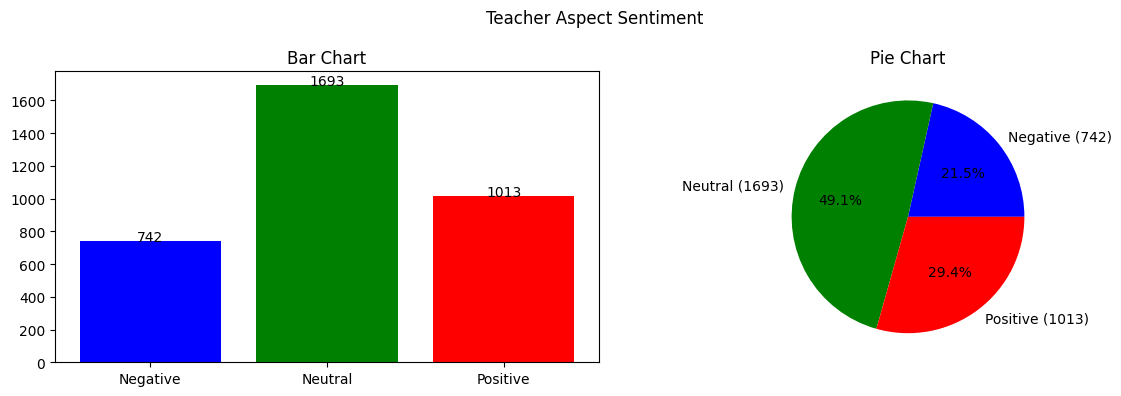

In [18]:
plot_bar_and_pie(result_data['labeles_aspect1'] ,'Teacher Aspect Sentiment')

# visualization for course aspect

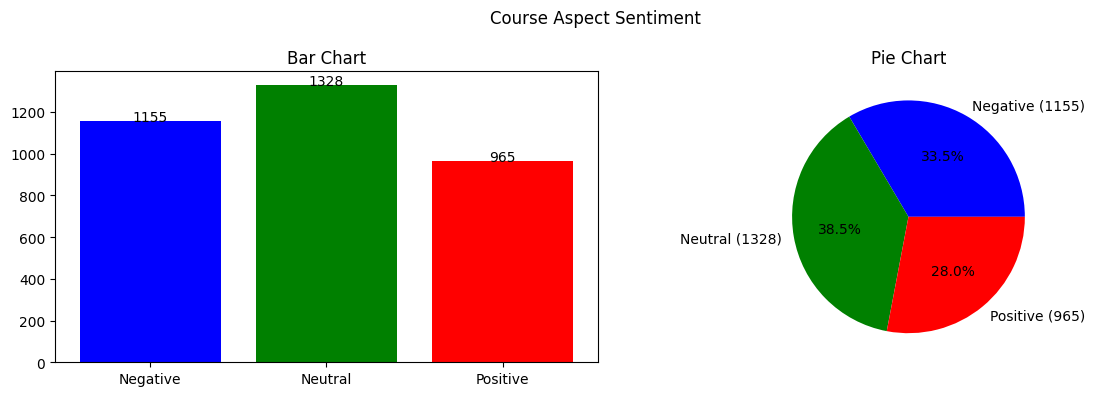

In [19]:
plot_bar_and_pie(result_data['labeles_aspect2'] , 'Course Aspect Sentiment')

In [13]:
len(df_data[(df_data["labeles_aspect1"] == 1) & (df_data["labeles_aspect2"] == 1)])

422032

In [14]:
len(df_data)

478773

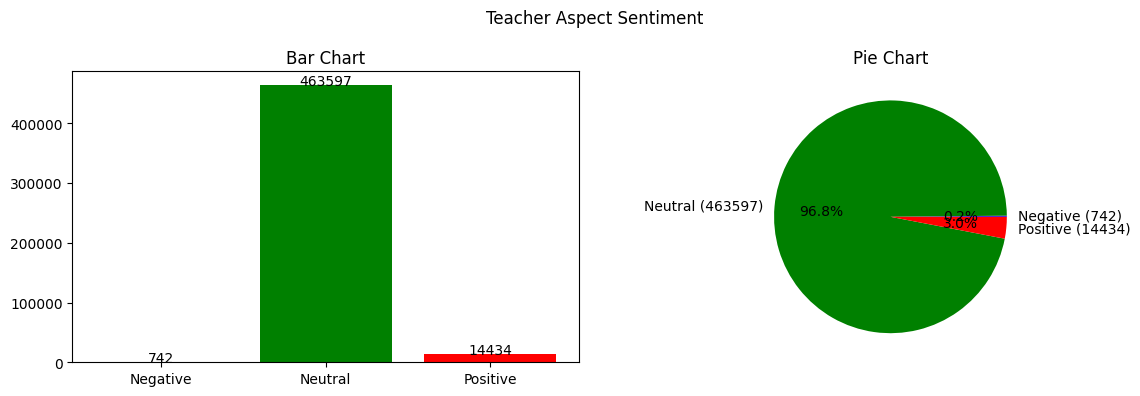

In [20]:
plot_bar_and_pie(df_data['labeles_aspect1'] ,'Teacher Aspect Sentiment')

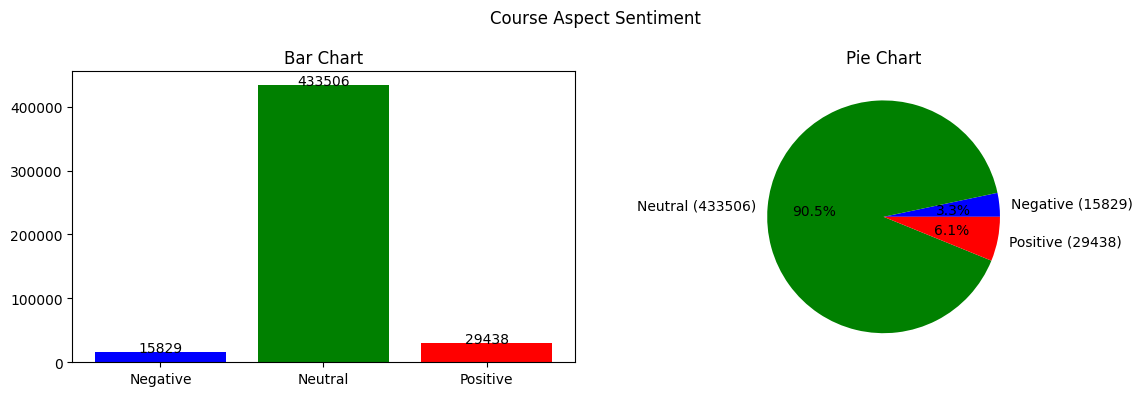

In [21]:
plot_bar_and_pie(df_data['labeles_aspect2'] , 'Course Aspect Sentiment')